# Exploratory Data Analysis

In [2]:
# import necessary packages

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# sentiment scores

df0 = pd.read_parquet('data/sentiment_data_0.parquet')
df1 = pd.read_parquet('data/sentiment_data_1.parquet')
df2 = pd.read_parquet('data/sentiment_data_2.parquet')    
df3 = pd.read_parquet('data/sentiment_data_3.parquet')
df4 = pd.read_parquet('data/sentiment_data_4.parquet')
df5 = pd.read_parquet('data/sentiment_data_5.parquet')
df6 = pd.read_parquet('data/sentiment_data_6.parquet')

In [4]:
# bias scores

df_us = pd.read_parquet('data/us_data_final.parquet')
df_china = pd.read_parquet('data/china_data_final.parquet')
df_italy = pd.read_parquet('data/italy_data_final.parquet')    
df_russia = pd.read_parquet('data/russia_data_final.parquet')

In [5]:
df0.head()

,ID,publishedAt,instances,source-name,location_code,location,category,year,month,new_title,neg,neu,pos,compound,sentiment_category
0,12436,2020-08-06T09:21:27Z,"[{'category': 'general', 'collectedAt': '2020-...",Albidda.net,ae,United Arab Emirates,general,2020,8,A doctor warns of new symptoms of “Corona” tha...,0.149,0.851,0.000,-0.2023,negative
1,12541,2020-08-06T15:45:39Z,"[{'category': 'general', 'collectedAt': '2020-...",Middle East Online,ae,United Arab Emirates,general,2020,8,Foldable phones lead Samsung to climb the top ...,0.000,0.893,0.107,0.2023,positive
2,12568,2020-08-06T16:43:05Z,"[{'category': 'general', 'collectedAt': '2020-...",Alanba.com.kw,ae,United Arab Emirates,general,2020,8,Explosive stars create calcium in - Kuwait New...,0.000,0.769,0.231,0.2732,positive
3,12795,2020-08-07T07:08:19Z,"[{'category': 'general', 'collectedAt': '2020-...",Al-ain.com,ae,United Arab Emirates,general,2020,8,Twitter secures the accounts of governments an...,0.000,0.881,0.119,0.3182,positive
4,13129,2020-08-07T13:33:00Z,"[{'category': 'general', 'collectedAt': '2020-...",محليات,ae,United Arab Emirates,general,2020,8,Corona patients without symptoms carry a viral...,0.176,0.824,0.000,-0.4939,negative


In [6]:
df_us.head()

,ID,publishedAt,source-name,location_code,location,category,year,month,new_title,neg,neu,pos,compound,sentiment_category,bias_category,bias_score
0,816,2020-08-07T11:15:00Z,Minneapolis Star Tribune,us,United States,general,2020,8,"Marlene Stollings, former Gophers women's bask...",0.315,0.685,0.0,-0.8316,negative,Non-biased,-0.679731
1,901,2020-08-07T11:34:08Z,Google News,us,United States,general,2020,8,How worried are American companies operating i...,0.309,0.691,0.0,-0.7003,negative,Biased,0.599910
2,961,2020-08-07T11:53:00Z,CNBC,us,United States,general,2020,8,5 things to know before the stock market opens...,0.000,1.000,0.0,0.0000,neutral,Biased,0.990865
3,1054,2020-08-07T12:17:53Z,Google News,us,United States,general,2020,8,Coronavirus: India becomes third country to pa...,0.000,1.000,0.0,0.0000,neutral,Non-biased,-0.832939
4,1147,2020-08-07T12:41:00Z,CNET,us,United States,general,2020,8,Galaxy Z Fold 2's hinge lets it do something o...,0.000,1.000,0.0,0.0000,neutral,Biased,0.665272


### Distribution Checks

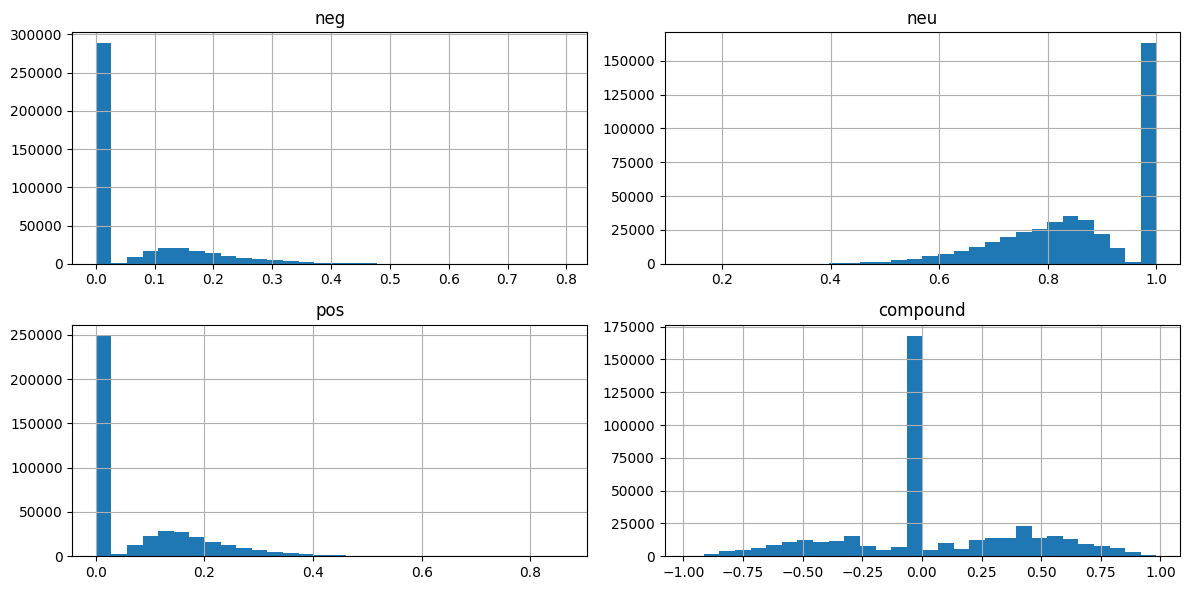

In [7]:
sent_cols = ["neg", "neu", "pos", "compound"]

df_count = pd.concat([df_us, df_russia, df_china, df_italy], ignore_index=True)

df_count[sent_cols].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.show()

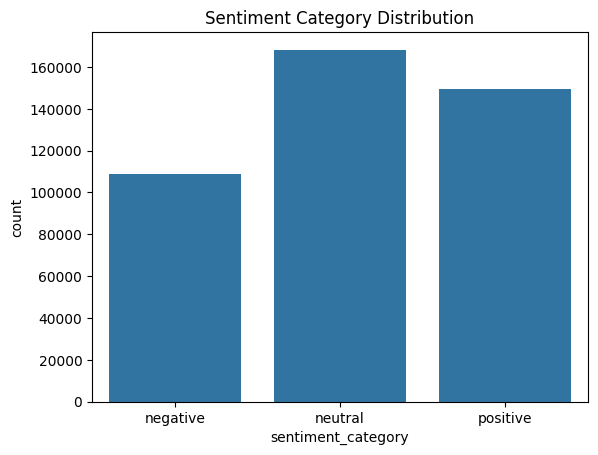

In [9]:
sns.countplot(data=df_count, x="sentiment_category")
plt.title("Sentiment Category Distribution")
plt.show()

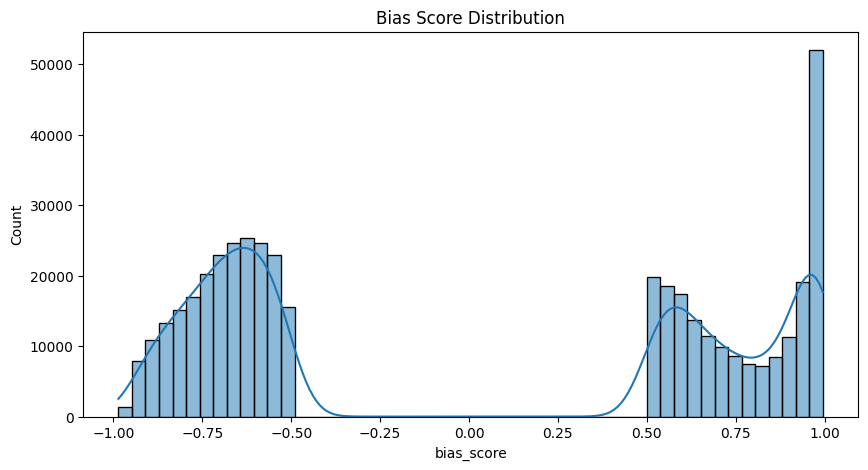

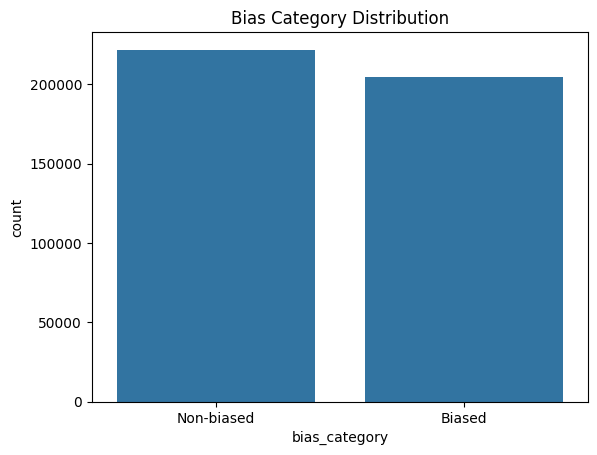

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df_count["bias_score"], kde=True)
plt.title("Bias Score Distribution")
plt.show()

sns.countplot(data=df_count, x="bias_category")
plt.title("Bias Category Distribution")
plt.show()

### Category-Level

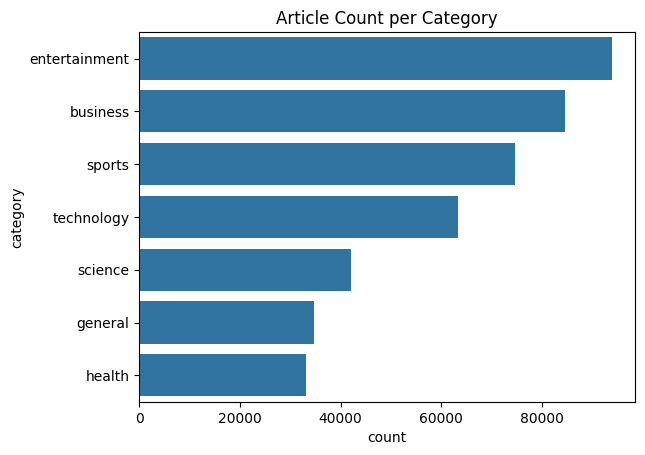

In [11]:
sns.countplot(data=df_count, y="category", order=df_count["category"].value_counts().index)
plt.title("Article Count per Category")
plt.show()

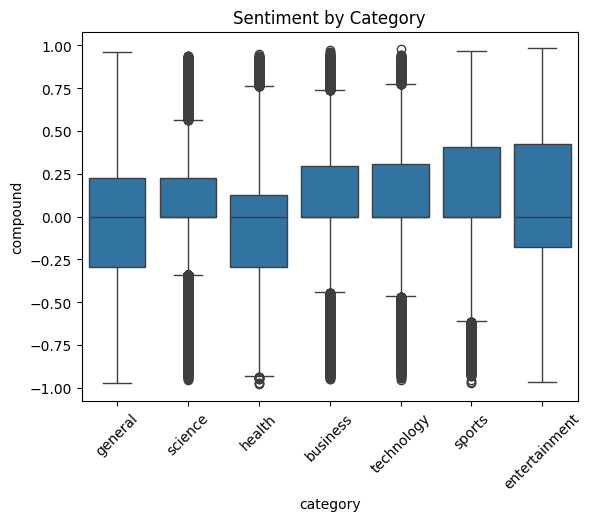

In [12]:
sns.boxplot(data=df_count, x="category", y="compound")
plt.xticks(rotation=45)
plt.title("Sentiment by Category")
plt.show()

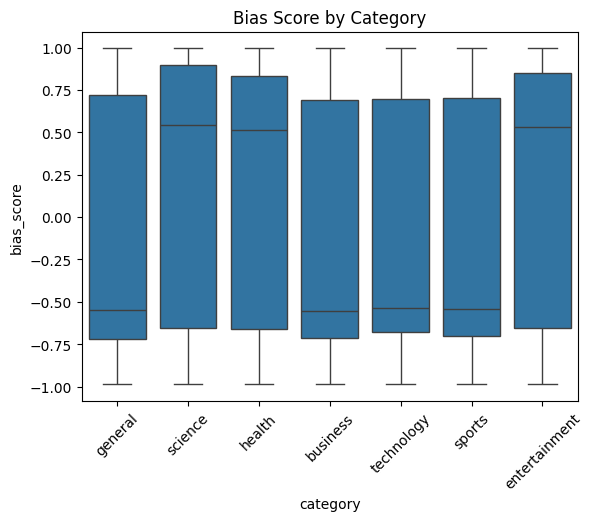

In [13]:
sns.boxplot(data=df_count, x="category", y="bias_score")
plt.xticks(rotation=45)
plt.title("Bias Score by Category")
plt.show()

### Source-Level

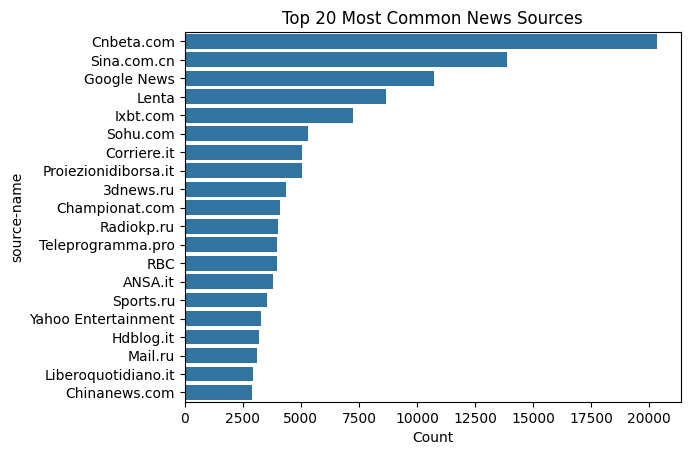

In [14]:
top_sources = df_count["source-name"].value_counts().head(20)

sns.barplot(x=top_sources.values, y=top_sources.index)
plt.title("Top 20 Most Common News Sources")
plt.xlabel("Count")
plt.show()

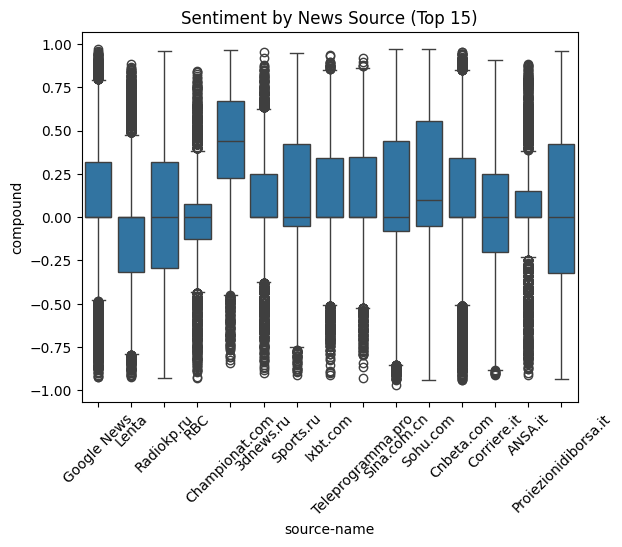

In [15]:
top15 = df_count["source-name"].value_counts().head(15).index
sns.boxplot(data=df_count[df_count["source-name"].isin(top15)], 
            x="source-name", y="compound")
plt.xticks(rotation=45)
plt.title("Sentiment by News Source (Top 15)")
plt.show()

### Sentiment vs. Bias

In [18]:
grouped = df_count.groupby("sentiment_category")["bias_score"].mean()
print(grouped)

sentiment_category
negative    0.005655
neutral    -0.026409
positive    0.062571
Name: bias_score, dtype: float64


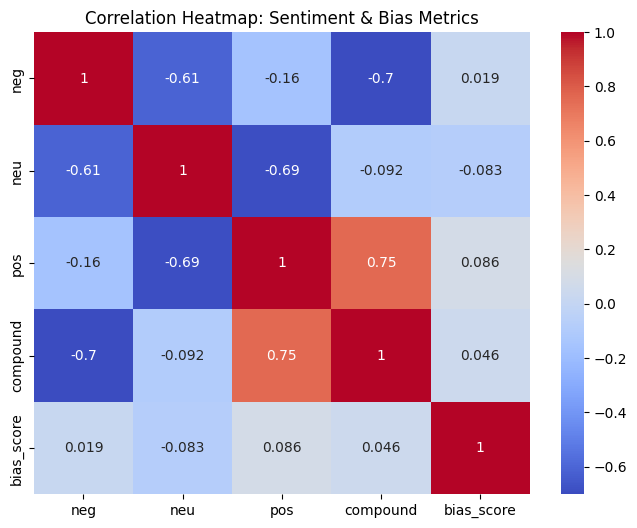

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_count[sent_cols + ["bias_score"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Sentiment & Bias Metrics")
plt.show()

In [20]:
pd.crosstab(df_count["sentiment_category"], df_count["bias_category"])

bias_category,Biased,Non-biased
sentiment_category,,
negative,51729,57084
neutral,76678,91645
positive,76235,73081


In [21]:
pd.crosstab(df_count["category"], df_count["bias_category"])

bias_category,Biased,Non-biased
category,,
business,36325,48302
entertainment,50452,43391
general,15342,19445
health,17233,15903
science,23363,18746
sports,33289,41299
technology,28638,34724


In [22]:
df_count.nlargest(10, "bias_score")[["new_title", "bias_score"]]
df_count.nsmallest(10, "bias_score")[["new_title", "bias_score"]]

,new_title,bias_score
305730,"Fragile workers, the Ministry of Health: age i...",-0.986267
17483,Zoo Knoxville tiger tests positive for COVID-1...,-0.986183
187920,History of coronavirus: details of US funding ...,-0.986074
424528,"AST/ODG/USSI, Barone's sentence is unacceptabl...",-0.985831
174578,MakSim's representative revealed the truth abo...,-0.985742
383595,Why do scientists study dangerous viruses in t...,-0.985629
421786,"Big Brother Vip, Nicola Pisu in the storm for ...",-0.985300
178311,In Sweden they talked about the death sentence...,-0.985085
364857,"Island of the Famous, Awed in the storm for a ...",-0.984776
350328,"Covid, German scientist: «Virus born from labo...",-0.984755


In [23]:
df_count.nsmallest(10, "compound")[["new_title", "compound"]]
df_count.nlargest(10, "compound")[["new_title", "compound"]]

,new_title,compound
237890,"Wang Lin joins the love station of ""My Heart B...",0.9834
249665,"""Heartbeat Again"" Huang Yi cooks in person for...",0.9817
267099,"""Praise for the Song"" 100 Likes Music Festival...",0.9806
267111,"""Island Keeper"" reveals behind-the-scenes spec...",0.9806
206770,"""Celebrating More Than Years"" won the Magnolia...",0.9802
272776,Wenxing Township held a cultural performance t...,0.9801
253881,"""My Heart Beats Again"" ends on Saturday, wheth...",0.9785
81033,NVIDIA GeForce RTX 30 SUPER Lineup Gets Rumore...,0.9780
287742,"""Tenet"" won the Huading Award for World's Best...",0.9776
287534,"""Tenet"" won the Huading Award for the best fil...",0.9764


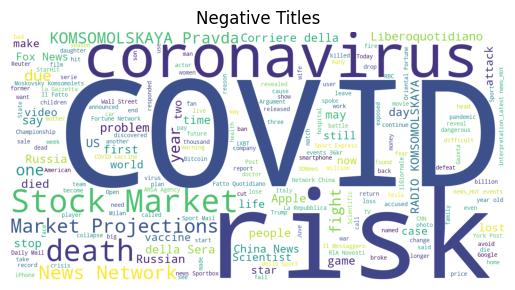

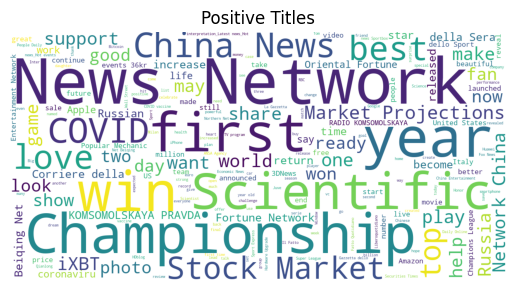

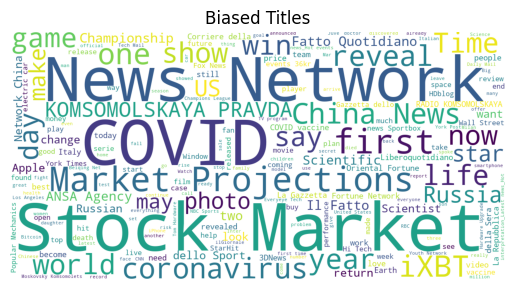

In [28]:
from wordcloud import WordCloud, STOPWORDS

# Define custom stopwords
custom_stopwords = STOPWORDS.union({
    "Sina", "will", "Exploration", "cnBeta", "Sohu", "Lenta",  # ← add any words you want removed
    "ru", "cnBeta", "s", "know", "without", "U", "new"
})

def make_wc(text, title):
    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        stopwords=custom_stopwords
    ).generate(" ".join(text))

    plt.imshow(wc)
    plt.axis("off")
    plt.title(title)
    plt.show()

make_wc(df_count[df_count.sentiment_category=="negative"]["new_title"], "Negative Titles")
make_wc(df_count[df_count.sentiment_category=="positive"]["new_title"], "Positive Titles")
make_wc(df_count[df_count.bias_category=="Biased"]["new_title"], "Biased Titles")

# Countries by Article Count

In [4]:
df_all = pd.concat([df0, df1, df2, df3, df4, df5, df6], ignore_index=True)

country_fix = {
    "United States": "United States of America",
    "Russia": "Russian Federation",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Iran": "Iran, Islamic Republic of",
    "Syria": "Syrian Arab Republic",
    "Vietnam": "Viet Nam",
    "Venezuela": "Venezuela, Bolivarian Republic of",
    "Bolivia": "Bolivia, Plurinational State of",
    "Congo": "Congo",
    "Democratic Republic of the Congo": "Congo, the Democratic Republic of the",
    "Tanzania": "Tanzania, United Republic of",
    "Moldova": "Moldova, Republic of",
    "Laos": "Lao People's Democratic Republic",
    "Myanmar": "Myanmar",
    "Taiwan": "Taiwan, Province of China",
    "Hong Kong": "Hong Kong",
}

df_all['location'] = df_all['location'].replace(country_fix)

In [9]:
country_counts = df_all['location'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

fig = px.choropleth(
    country_counts,
    locations="country",
    locationmode="country names",
    color="count",
    color_continuous_scale="Viridis",
    title="Number of Articles Published by Country"
)
fig.update_layout(title_font_family="Times New Roman")

fig.show()

C:\Users\erina\AppData\Local\Temp\ipykernel_32004\903023547.py:4: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



# Matching Sources to Countries

In [10]:
df_usa = df_all[df_all['location'] == "United States of America"]

# top 20 news sources
top_sources = df_usa['source-name'].value_counts().head(20).index
df_usa_top = df_usa[df_usa['source-name'].isin(top_sources)]

# count
source_counts = df_usa_top['source-name'].value_counts().reset_index()
source_counts.columns = ['source-name', 'count']

# horizontal bar chart
fig = px.bar(
    source_counts,
    x='count',
    y='source-name',
    orientation='h',
    title='Top 20 USA News Sources by Article Count'
)
fig.update_layout(title_font_family="Times New Roman")
fig.show()


# Articles Published by Year

In [7]:
year_counts = df_all['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'count']

fig = px.bar(
    data_frame=year_counts,
    x='year',
    y='count',
    title="Articles Published by Year",
)
fig.update_xaxes(type='category')
fig.show()

In [8]:
all_years = pd.DataFrame({'year': range(2000, 2026)})
year_counts_complete = all_years.merge(year_counts, on='year', how='left').fillna(0)
year_counts_complete['count'] = year_counts_complete['count'].astype(int)

print(year_counts_complete)

    year    count
0   2000        0
1   2001        0
2   2002        0
3   2003        0
4   2004        0
5   2005        0
6   2006        7
7   2007        0
8   2008        2
9   2009        1
10  2010        8
11  2011        3
12  2012       26
13  2013       32
14  2014       55
15  2015      280
16  2016     1166
17  2017     2075
18  2018     2181
19  2019     2916
20  2020  1498291
21  2021  3212151
22  2022        0
23  2023        0
24  2024        0
25  2025        0


# Missing Values

In [9]:
null_counts = df_all.isnull().sum()
print(null_counts)

ID                    0
publishedAt           5
instances             0
source-name           0
location_code         0
location              0
category              0
year                  5
month                 5
new_title             0
neg                   0
neu                   0
pos                   0
compound              0
sentiment_category    0
dtype: int64


# Sentiment Scores

In [10]:
df_all.columns

Index(['ID', 'publishedAt', 'instances', 'source-name', 'location_code',
       'location', 'category', 'year', 'month', 'new_title', 'neg', 'neu',
       'pos', 'compound', 'sentiment_category'],
      dtype='object')

In [12]:
df_all[['neg', 'neu', 'pos', 'compound']].describe()

,neg,neu,pos,compound
count,4.719199e+06,4.719199e+06,4.719199e+06,4.719199e+06
mean,6.202690e-02,8.602620e-01,7.771148e-02,4.040715e-02
std,1.029679e-01,1.373714e-01,1.092550e-01,3.804199e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,-9.838000e-01
25%,0.000000e+00,7.670000e-01,0.000000e+00,-1.027000e-01
50%,0.000000e+00,8.660000e-01,0.000000e+00,0.000000e+00
75%,1.210000e-01,1.000000e+00,1.520000e-01,3.182000e-01
max,8.040000e-01,1.000000e+00,1.000000e+00,9.892000e-01


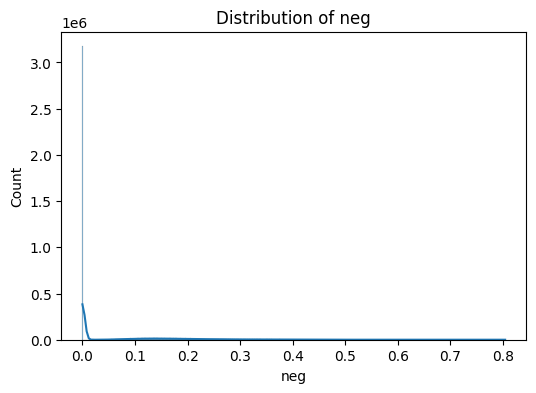

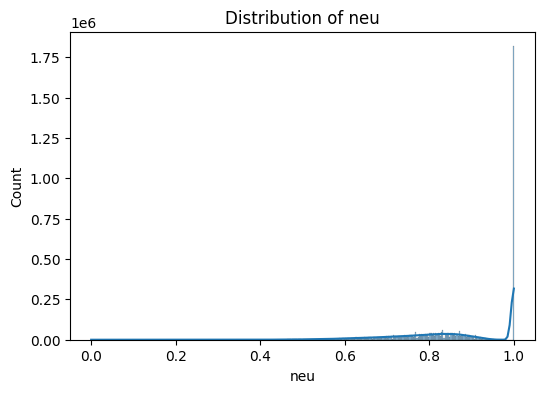

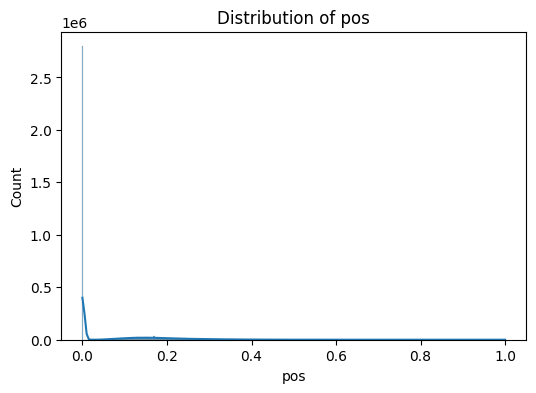

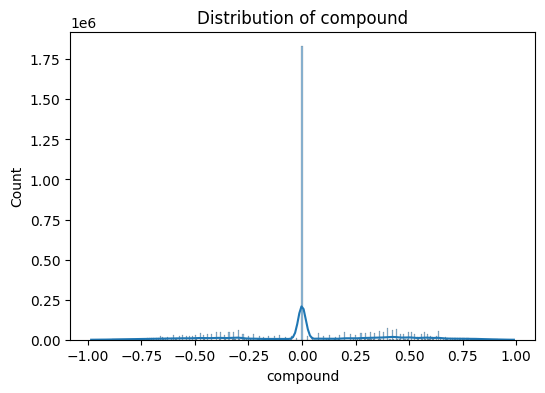

In [13]:
score_cols = ['neg', 'neu', 'pos', 'compound']

for col in score_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df_all[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

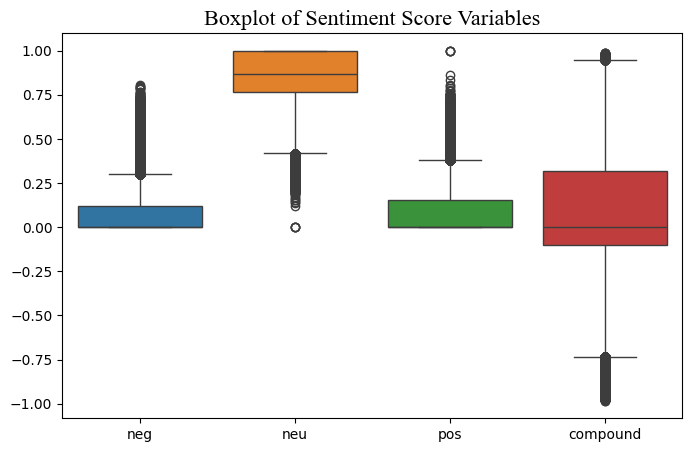

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_all[score_cols])
plt.title("Boxplot of Sentiment Score Variables", fontdict={'family':'Times New Roman', 'size':16})
plt.show()

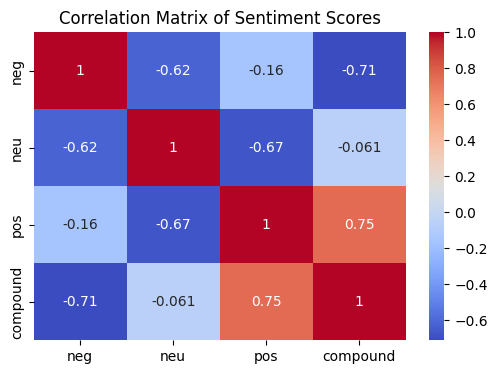

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df_all[score_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Sentiment Scores")
plt.show()

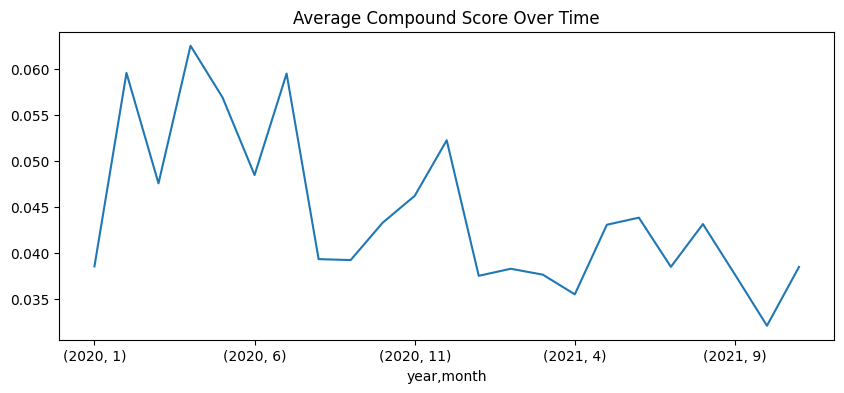

In [16]:
df_all[df_all["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

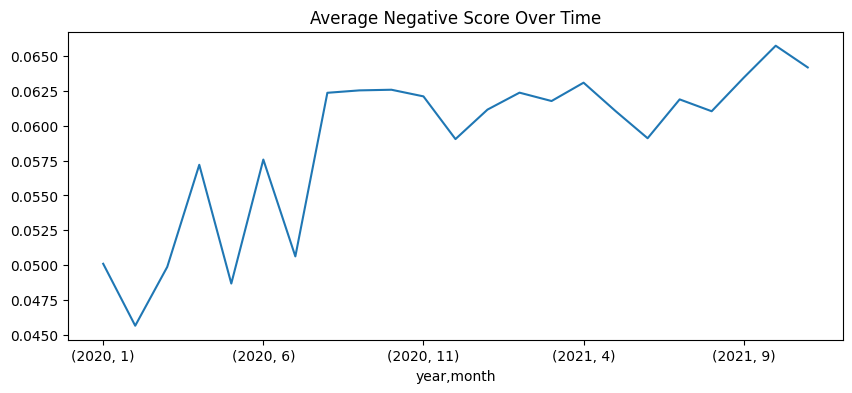

In [17]:
df_all[df_all["year"] > 2019].groupby(['year', 'month'])['neg'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Negative Score Over Time")
plt.show()

# Countries Chosen for Bias Analysis

### Russia

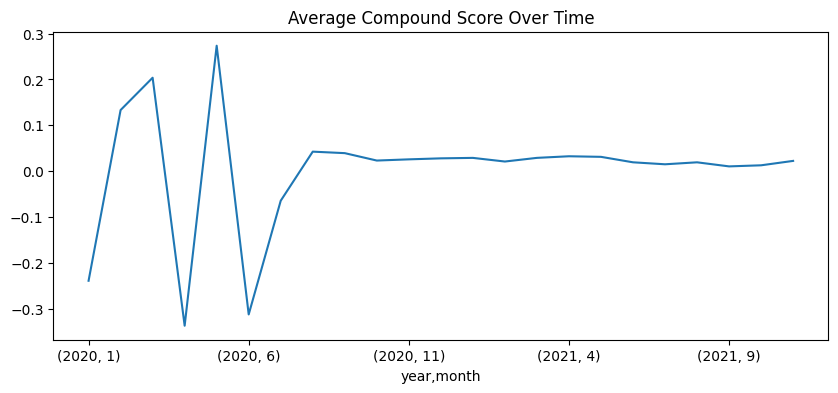

In [18]:
df_rus = df_all[df_all["location"] == 'Russian Federation']

df_rus[df_rus["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### India

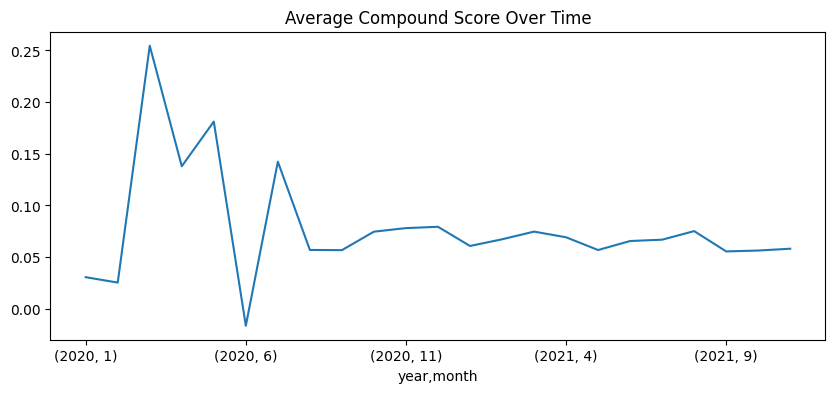

In [19]:
df_india = df_all[df_all["location"] == 'India']

df_india[df_india["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### Italy

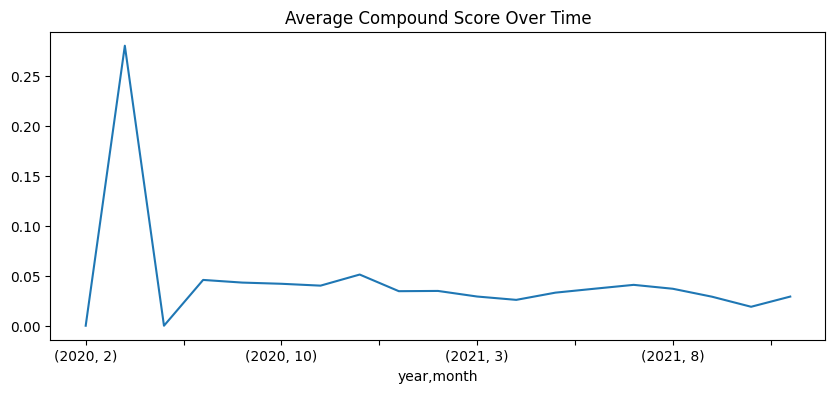

In [20]:
df_italy = df_all[df_all["location"] == 'Italy']

df_italy[df_italy["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### China

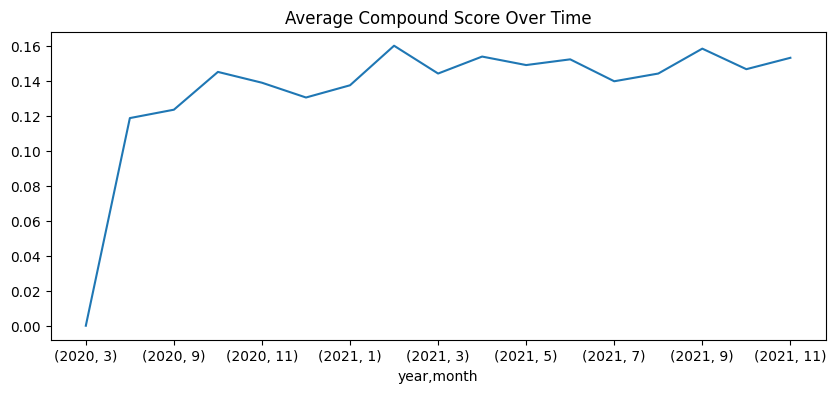

In [21]:
df_china = df_all[df_all["location"] == 'China']

df_china[df_china["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### Canada

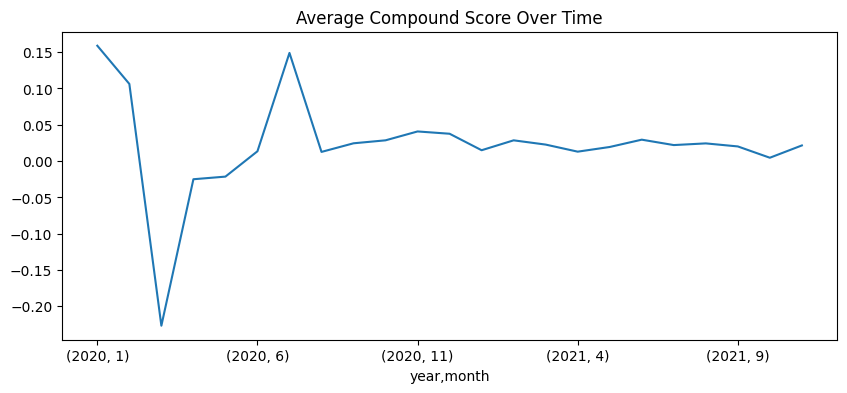

In [22]:
df_ca = df_all[df_all["location"] == "Canada"]

df_ca[df_ca["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### United States of America

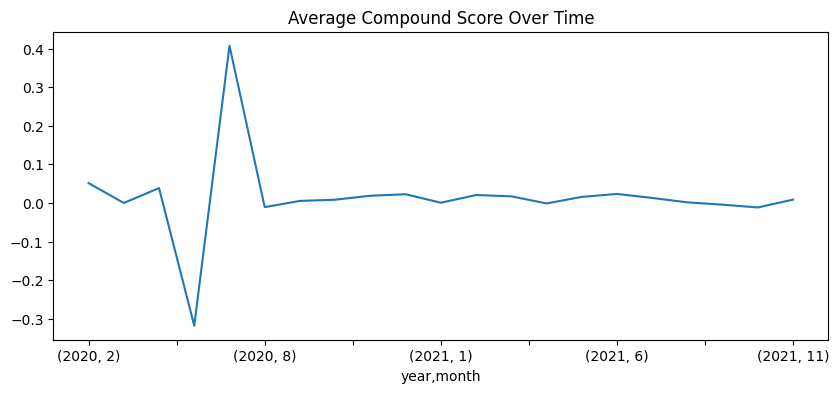

In [23]:
df_usa = df_all[df_all["location"] == 'United States of America']

df_usa[df_usa["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()

### Argentina

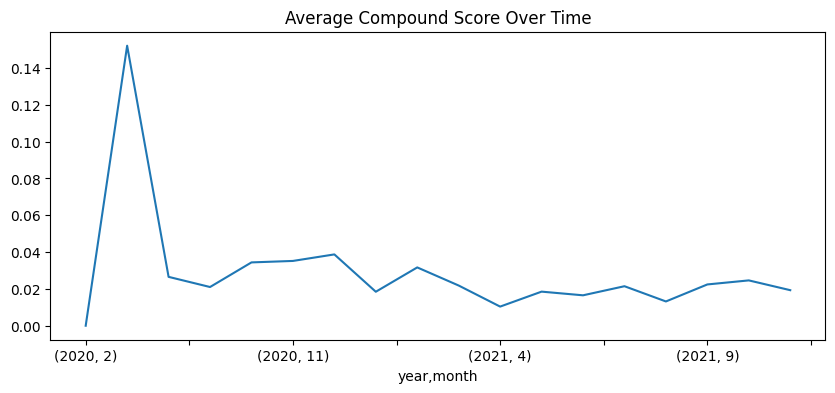

In [24]:
df_arg = df_all[df_all["location"] == 'Argentina']

df_arg[df_arg["year"] > 2019].groupby(['year', 'month'])['compound'].mean().plot(kind='line', figsize=(10,4))
plt.title("Average Compound Score Over Time")
plt.show()